In [1]:
# import libraries and data set
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from sklearn.impute import SimpleImputer

# setting index and dropping irrelevant columns
data = pd.read_csv('complete_dataframe.csv',low_memory=False)
data.set_index('Unnamed: 0',inplace=True)
data.drop(columns=['WARNING','LABORATORY_BATCH'],inplace=True)
data.index.name='Sample_ID'
data.dropna(inplace=True)
print(data.shape)
data.head(5)


(168, 22310)


,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,MONTHS_TO_LAST_CONTACT_OR_DEATH,SMOKING_HISTORY,SURGICAL_MARGINS,PATHOLOGIC_N_STAGE,PATHOLOGIC_T_STAGE,MEDIAN_INTENSITY_UNNORMALIZED,PCT_ARRAY_OUTLIER,PCT_SINGLE_OUTLIER,Histologic grade,High_risk
Sample_ID,,,,,,,,,,,,,,,,,,,,,
NCI_U133A_64L,10.394160,6.307711,7.290440,8.761087,4.112526,8.463786,5.476750,4.998902,7.725870,4.183584,...,52,Never smoked,ALL MARGINS PATHOLOGICALLY NEGATIVE,"N0, ACCORDING TO AJCC CRITERIA","T2, ACCORDING TO AJCC CRITERIA",192.0,2.850,0.350,POORLY DIFFERENTIATED,0.0
NCI_U133A_99L,10.890421,6.307370,6.835464,8.524622,4.200539,7.584603,5.352621,4.941038,5.878343,4.005468,...,47,Smoked in the past,ALL MARGINS PATHOLOGICALLY NEGATIVE,"N0, ACCORDING TO AJCC CRITERIA","T2, ACCORDING TO AJCC CRITERIA",193.0,3.666,0.244,POORLY DIFFERENTIATED,0.0
CL20041119183AA,9.899857,6.943395,7.134017,8.609977,4.224799,7.683437,5.324414,5.066334,7.899185,4.257538,...,12,Smoked in the past,ALL MARGINS PATHOLOGICALLY NEGATIVE,"N1, ACCORDING TO AJCC CRITERIA","T2, ACCORDING TO AJCC CRITERIA",193.0,1.310,0.102,POORLY DIFFERENTIATED,1.0
CL2005060333AA,11.805876,6.953688,7.106698,8.555329,4.152476,7.909073,5.302835,4.884714,7.114167,4.204344,...,71,Smoked in the past,ALL MARGINS PATHOLOGICALLY NEGATIVE,"N1, ACCORDING TO AJCC CRITERIA","T2, ACCORDING TO AJCC CRITERIA",191.0,2.419,0.260,POORLY DIFFERENTIATED,0.0
NCI_U133A_38L,10.388829,6.499772,7.040770,8.862022,4.277515,8.304791,5.196159,4.916140,7.377869,4.090953,...,100,Never smoked,ALL MARGINS PATHOLOGICALLY NEGATIVE,"N1, ACCORDING TO AJCC CRITERIA","T2, ACCORDING TO AJCC CRITERIA",193.0,0.494,0.052,POORLY DIFFERENTIATED,0.0


In [2]:
import matplotlib.pyplot as plt

cat_cols = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [4]:
X = data.drop(columns=['High_risk']) # features
y = data['High_risk'] #target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

data.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,MONTHS_TO_LAST_CONTACT_OR_DEATH,SMOKING_HISTORY,SURGICAL_MARGINS,PATHOLOGIC_N_STAGE,PATHOLOGIC_T_STAGE,MEDIAN_INTENSITY_UNNORMALIZED,PCT_ARRAY_OUTLIER,PCT_SINGLE_OUTLIER,Histologic grade,High_risk
Sample_ID,,,,,,,,,,,,,,,,,,,,,
NCI_U133A_64L,10.394160,6.307711,7.290440,8.761087,4.112526,8.463786,5.476750,4.998902,7.725870,4.183584,...,52,1,0,0,1,192.0,2.850,0.350,1,0.0
NCI_U133A_99L,10.890421,6.307370,6.835464,8.524622,4.200539,7.584603,5.352621,4.941038,5.878343,4.005468,...,47,2,0,0,1,193.0,3.666,0.244,1,0.0
CL20041119183AA,9.899857,6.943395,7.134017,8.609977,4.224799,7.683437,5.324414,5.066334,7.899185,4.257538,...,12,2,0,1,1,193.0,1.310,0.102,1,1.0
CL2005060333AA,11.805876,6.953688,7.106698,8.555329,4.152476,7.909073,5.302835,4.884714,7.114167,4.204344,...,71,2,0,1,1,191.0,2.419,0.260,1,0.0
NCI_U133A_38L,10.388829,6.499772,7.040770,8.862022,4.277515,8.304791,5.196159,4.916140,7.377869,4.090953,...,100,1,0,1,1,193.0,0.494,0.052,1,0.0


In [12]:
# DNN Gene Expression Based Cancer Prediction

from sklearn.utils import class_weight
from tensorflow.keras.regularizers import l2

def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

results = []

model = create_model()

history = model.fit(X_train, y_train, epochs=50, batch_size=30, validation_split=0.2)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.4826 - loss: 1.8984 - val_accuracy: 0.5185 - val_loss: 1.6544
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5565 - loss: 1.7783 - val_accuracy: 0.5556 - val_loss: 1.8082
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5963 - loss: 1.6487 - val_accuracy: 0.5926 - val_loss: 1.8471
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6309 - loss: 1.5084 - val_accuracy: 0.6296 - val_loss: 1.8585
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7023 - loss: 1.4794 - val_accuracy: 0.6296 - val_loss: 1.8594
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7683 - loss: 1.3842 - val_accuracy: 0.6296 - val_loss: 1.8273
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7249 - loss: 1.3998 - val_accuracy: 0.6296 - val_loss: 1.8021
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7453 - loss: 1.3678 - val_accuracy: 0.7037 - val_loss: 1.7854


In [14]:
# Predict on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

         0.0       0.76      0.65      0.70        20
         1.0       0.59      0.71      0.65        14

    accuracy                           0.68        34
   macro avg       0.68      0.68      0.67        34
weighted avg       0.69      0.68      0.68        34

AUC-ROC: 0.7285714285714285


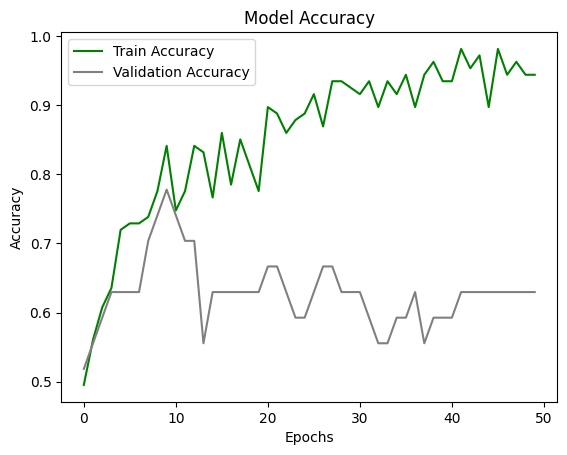

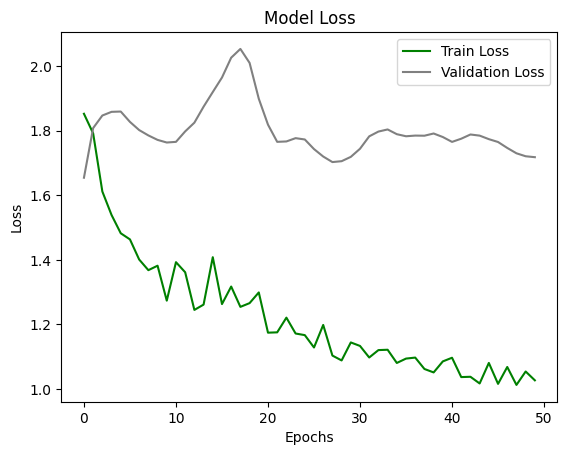

In [15]:

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy',c='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',c='gray')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss',c='green')
plt.plot(history.history['val_loss'], label='Validation Loss',c='gray')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()